# Liner Regression with mpg dataset
This is the same dataset we saw earlier, it comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
 - [Dataset info](https://archive.ics.uci.edu/ml/datasets/auto+mpg)
 
Similar data for newer cars can be found at https://fueleconomy.gov/ but for this exercise we will use the UCI dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory data analysis

In [2]:
# Load the dataset from seaborn
# The data is downloaded from https://github.com/mwaskom/seaborn-data
df = sns.load_dataset('mpg')

In [3]:
# Converting some data to metric units
mile = 1.609344 # km
gallon = 3.7854 # litres
pound = 2.20462 # kg
# Since most common cars weight around 1 ton, it's a very convenient unit to use
df['weight'] = df.weight / pound / 1000
# Converting to Litres per 100 km is actually important to get a better linear fit
df['lphk'] = gallon / mile / df.mpg * 100  # lphk is Litres per 100 km

In [4]:
# We will use these columns as potential explanatory variables for fuel consumption (lphk)
fit_cols = ['weight', 'cylinders', 'displacement', 'horsepower']
# Discard several rows with missing values in the columns of interest
df = df.dropna(subset=fit_cols)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,lphk
0,18.0,8,307.0,130.0,1.589390,12.0,70,usa,chevrolet chevelle malibu,13.067436
1,15.0,8,350.0,165.0,1.675119,11.5,70,usa,buick skylark 320,15.680923
2,18.0,8,318.0,150.0,1.558545,11.0,70,usa,plymouth satellite,13.067436
3,16.0,8,304.0,150.0,1.557184,12.0,70,usa,amc rebel sst,14.700866
4,17.0,8,302.0,140.0,1.564442,10.5,70,usa,ford torino,13.836109


#### Run `sns.load_dataset??` (with the two question marks) and look a the function code to verify where the data comes from. Is it cached?

In [6]:
sns.load_dataset??

#### Plot a histogram of car weights

(array([30., 89., 58., 52., 36., 40., 29., 34., 18.,  6.]),
 array([0.73164536, 0.89162758, 1.0516098 , 1.21159202, 1.37157424,
        1.53155646, 1.69153868, 1.8515209 , 2.01150312, 2.17148534,
        2.33146755]),
 <a list of 10 Patch objects>)

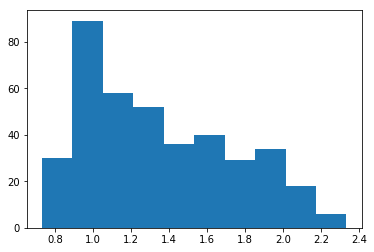

In [10]:
plt.hist(df["weight"])

#### Plot a histogram of the `model_year`

(array([56., 28., 40., 26., 30., 62., 36., 29., 27., 58.]),
 array([70. , 71.2, 72.4, 73.6, 74.8, 76. , 77.2, 78.4, 79.6, 80.8, 82. ]),
 <a list of 10 Patch objects>)

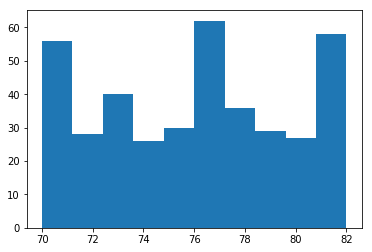

In [12]:
plt.hist(df['model_year'])

#### Find how many cars there are for each number of cylinders

In [17]:
sum(df['cylinders'])/len(df)

5.471938775510204

#### Find what are the car models with unusual number of cylinders (3 or 5)

In [41]:
unusualCyl = df[(df['cylinders'] == 3) | (df['cylinders'] == 5)]
unusualCyl

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,lphk
71,19.0,3,70.0,97.0,1.056871,13.5,72,japan,mazda rx2 coupe,12.379676
111,18.0,3,70.0,90.0,0.963431,13.5,73,japan,maxda rx3,13.067436
243,21.5,3,80.0,110.0,1.233773,13.5,77,japan,mazda rx-4,10.940179
274,20.3,5,131.0,103.0,1.283668,15.9,78,europe,audi 5000,11.586889
297,25.4,5,183.0,77.0,1.601183,20.1,79,europe,mercedes benz 300d,9.260388
327,36.4,5,121.0,67.0,1.338099,19.9,80,europe,audi 5000s (diesel),6.461919
334,23.7,3,70.0,100.0,1.097695,12.5,80,japan,mazda rx-7 gs,9.924635


#### Use `df.describe()` to explore the dataset. What years does it cover? What are the extremes of car weight?

In [42]:
df.describe()
# It covers the 1970 to 1982 Model Years
# The extreme weight is 2.331 tons.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,lphk
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,1.350611,15.541327,75.979592,11.248497
std,7.805007,1.705783,104.644004,38.491160,0.385283,2.758864,3.683737,3.913826
min,9.000000,3.000000,68.000000,46.000000,0.731645,8.000000,70.000000,5.047508
25%,17.000000,4.000000,105.000000,75.000000,1.009358,13.775000,73.000000,8.110822
50%,22.750000,4.000000,151.000000,93.500000,1.271648,15.500000,76.000000,10.340319
75%,29.000000,8.000000,275.750000,126.000000,1.639625,17.025000,79.000000,13.836109
max,46.600000,8.000000,455.000000,230.000000,2.331468,24.800000,82.000000,26.134872


#### Take a look at df.shape, how many cars are in this dataset, and how many features per car?

In [43]:
df.shape
# 392 Cars with 10 features per car

(392, 10)

#### Find the lightest and heaviest cars, what make and model are they?

In [110]:
df[df.weight == df.weight.min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,lphk
54,35.0,4,72.0,69.0,0.731645,18.0,71,japan,datsun 1200,6.720396


In [86]:
df[df.weight == df.weight.max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,lphk
44,13.0,8,400.0,175.0,2.331468,12.0,71,usa,pontiac safari (sw),18.093373


#### Find the most fuel efficient car

In [109]:
df[df.mpg == df.mpg.min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,lphk
28,9.0,8,304.0,193.0,2.146402,18.5,70,usa,hi 1200d,26.134872


#### For each of the columns in `fit_cols` plot `lphk` as a function of that column (`lphk`  on the `y` axis). Check if any linear relationship is clearly visible

In [125]:
plt.figure(19,5)

TypeError: from_bounds() argument after * must be an iterable, not int

## Linear fit using 1 variable - weight

In [17]:
# First let's run a fit using np.polyfit like we did before
a, b = np.polyfit(df.weight, df.lphk, 1)
# a is slope, b is intercept
a, b 

(8.990678430157544, -0.8944124063800307)

#### Using a and b, what will be the predicted consumption of a hypothetical car weighting 1.2 tons?

#### Find the predicted consumption for all of the following car weights

In [8]:
x = np.arange(np.floor(df.weight.min()*10), np.ceil(df.weight.max()*10))/10
x

array([0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
       2. , 2.1, 2.2, 2.3])

#### Make a plot of lphk as a function of weight with the fit line in red on top
 - Use the weights and predicted consumption from the previous step for the red fit line

#### Find the predicted consumption for all cars (call the variable `y_pred`)

#### Plot the predicted consumption `y_pred` as a function of the real consumption. Does the prediction look good? Reasonable?

#### Numerical estimate of how good this fit is
 - One common measure for the quality of a linear fit is the mean square error (MSE)
 - Assume that $y_i$ is the real value from data and $\hat{y}_i$ is the predicted value found as $\hat{y}_i = ax_i + b$
 - Taking the differences between the real and predicted values, then squaring them as $(y_i - \hat{y}_i)^2$ and then averaging gives the MSE
 
$MSE = \frac{1}{N} \sum{(y_i - \hat{y}_i)^2}$

#### Find the MSE for this fit

## Same fit using sklearn.linear_models.LinearRegression
The 4 steps of model use in sklearn:
 1. Import (the Python class for the model you want to use)
 2. Instantiate (the class to create an object)
 3. Fit
 4. Predict
 
Just run the steps below, no need to modify this code

#### 1. Import

In [25]:
from sklearn.linear_model import LinearRegression

#### 2. Instantiate

In [26]:
linreg = LinearRegression()

#### 3. Fit

In [27]:
X = df[['weight']] # fit() expects a 2D array or a pd.DataFrame for X
y = df.lphk        # fit() expects a 1D array or a pd.Series for y
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 4. Predict

In [28]:
y_pred2 = linreg.predict(X)
# predict() takes a 2D array or pd.DataFrame with the same number of columns as used in fit() (in this case 1 column)

#### Take a look at `linreg.coef_` and `linreg.intercept_` and compare them to a and b from before

In [ ]:
a, b

#### Compare y_pred and y_pred2, are they (nearly) the same?

#### sklearn comes with a variety of metrics used to estimate quality of models, including the MSE. Run the cell below and verify that the result is the same as the one you got before

In [32]:
from sklearn import metrics
metrics.mean_squared_error(df.lphk, y_pred2)

3.310582608535969

## Regression with multiple explanatory variables
is no different from the univariate case, the prediction for 3 explanatory variables looks like this:

$ \hat{y} = a_1 x_1 + a_2 x_2 + a_3 x_3 + b $

The coefficients in `linreg.coef_` will be `[a1, a2, a3]` after the fit()

#### Using the X with all columns from `fit_cols` copy and repeat the fit and predict steps above to obtain a new fit
 - Import is no longer needed since the LinearRegression class is already imported
 - It's up to you whether to instantiate a new object or reuse the old one. It's considered to be a good practice to create a new one in such cases, since it reduced the risk of confusion, but it's not a strict rule.

In [33]:
# Use X with all columns in fit_cols
X = df[fit_cols]

#### Take a look at the coefficients (they come ins the same order as columns in X)

#### Use `metrics.mean_squared_error()` to compute the MSE again. Does it mean we got a better or worse fit?

#### Try excluding each of the 4 columns from the X (one at a time), run the fit and compute MSE each time. Which of the column results in the largest degradation in quality of fit when removed?
 - This can be interpreted as an estimate of importance of that column in explaining the dependant variable

#### Which of the 4 columns is least valuable for the fit?